In [2]:
#below section contains the libraries used in this code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the listings data (Source: http://insideairbnb.com/get-the-data.html)
popular_areas = pd.read_csv("D:/Raghvendra/Masters/Irish Applications/DCU/DCU subjects study/Sem2_CA683 data analytics and data mining/Main Assignment/berlin airbnb 2020/listings_summary.csv")
#df_listings = pd.read_csv("https://github.com/MrRaghav/DataScience/blob/master/DCU_works/listings.csv")

C:\Users\Raghvendra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
popular_areas.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12


In [5]:
# Check distriution of property types
count_of_properties = popular_areas["property_type"].value_counts().sum()
print((popular_areas["property_type"].value_counts().sort_values(ascending=False) / count_of_properties).head())

Apartment             0.888439
Condominium           0.025400
Loft                  0.019764
House                 0.018693
Serviced apartment    0.012025
Name: property_type, dtype: float64


In [6]:
# Number of unique property types
print("Alright, so {} unique properties are available in Airbnb-Berlin!".format(len(popular_areas["property_type"].unique())))

Alright, so 36 unique properties are available in Airbnb-Berlin!


As, most of them are "apartments" ,so, let's bring them to the spotlight for our analysis

In [7]:
# Keep only apartments in analysis
Total_properties = popular_areas.shape[0]
popular_areas = popular_areas[popular_areas["property_type"] == "Apartment"]

In [8]:
print("Finally, {} properties have been removed from the Airbnb Berlin".format(Total_properties - popular_areas.shape[0]))

Finally, 2811 properties have been removed from the Airbnb Berlin


There are 106 columns in this data frame. But, to check the popularity, we will take following columns into account:

1. minimum_nights
2. reviews_per_month
3. neighbourhood_group_cleansed

While checking the csv file manually, we can see a lot of missing values. 
Let us check them using python...

In [9]:
# Check for missing values
popular_areas[["neighbourhood_group_cleansed","minimum_nights","reviews_per_month"]].isnull().sum()

neighbourhood_group_cleansed       0
minimum_nights                     0
reviews_per_month               3953
dtype: int64

We can see that 'reviews per month' have missing values. We will impute them with 0.

We know that out of 3 types of missing values (MCAR, MAR, MNAR), this column falls under MCAR.

* We can use mean/median but that will skew our results.
* imputing 0 means not a single review was given to that property


In [10]:
# Impute missing values
popular_areas["reviews_per_month"] = popular_areas["reviews_per_month"].fillna(0)

# Check for missing values
popular_areas[["reviews_per_month"]].isnull().sum()

reviews_per_month    0
dtype: int64

In [11]:
# Check distriution of neighbourhood groups
count_value = popular_areas["neighbourhood_group_cleansed"].value_counts().sum()
print((popular_areas["neighbourhood_group_cleansed"].value_counts().sort_values(ascending=False) / count_value))

Friedrichshain-Kreuzberg    0.241490
Mitte                       0.206111
Neukölln                    0.160234
Pankow                      0.158135
Charlottenburg-Wilm.        0.071875
Tempelhof - Schöneberg      0.067542
Lichtenberg                 0.031002
Treptow - Köpenick          0.025239
Steglitz - Zehlendorf       0.018449
Reinickendorf               0.012284
Spandau                     0.004467
Marzahn - Hellersdorf       0.003172
Name: neighbourhood_group_cleansed, dtype: float64


In [12]:
# Number of unique neighbourhood groups
print("Alright, {} unique types of groups have been identified".format(len(popular_areas["neighbourhood_group_cleansed"].unique())))

Alright, 12 unique types of groups have been identified


In [13]:
# Adjust values of "neighbourhood_group_cleansed"
popular_areas["neighbourhood_group_cleansed"] = popular_areas["neighbourhood_group_cleansed"].astype(str).str.replace("Charlottenburg-Wilm.", "Charlottenburg-Wilmersdorf")
popular_areas["neighbourhood_group_cleansed"] = popular_areas["neighbourhood_group_cleansed"].astype(str).str.replace(" ", "")

In [14]:
popular_areas.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3176,https://www.airbnb.com/rooms/3176,20200218053611,2020-02-18,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.12


Now, basically the popularity of any area will depend on

1. Number of properties in an area
2. Occupancy of individual apartment

* "minimum_nights" is being considered as the duration of occupancy

* "The Washington Post" reported that owners can get bookings for 182 days in an year. which comes to 15 days a month.
https://www.washingtonpost.com/world/europe/berlin-had-some-of-the-worlds-most-restrictive-rules-for-airbnb-rentals-now-its-loosening-up/2018/03/27/e3acda90-2603-11e8-a227-fd2b009466bc_story.html

In [15]:

# Define adjusted proxy for number of bookings per months
popular_areas["max_bookings_per_month"] = (15 / popular_areas["minimum_nights"]).fillna(0)
popular_areas["bookings_per_month"] = popular_areas[["max_bookings_per_month","reviews_per_month"]].min(axis=1)
popular_areas = popular_areas.drop("max_bookings_per_month", axis=1)

popular_areas["bookings_per_month"].describe()

count    22386.000000
mean         0.793337
std          1.291184
min          0.000000
25%          0.040000
50%          0.260000
75%          0.930000
max         15.000000
Name: bookings_per_month, dtype: float64

In [18]:
popular_areas["bookings_per_month"].head(3)

0    0.241935
1    0.340000
3    2.240000
Name: bookings_per_month, dtype: float64

In [20]:
# Calculate the monthly occupancy rate for each listing
popular_areas["occupancy_rate"] = (popular_areas["bookings_per_month"] * popular_areas["minimum_nights"] / 15).fillna(0)
popular_areas["occupancy_rate"].describe()

count    22386.000000
mean         0.150796
std          0.226698
min          0.000000
25%          0.008000
50%          0.054000
75%          0.190667
max          1.000000
Name: occupancy_rate, dtype: float64

In [21]:
popular_areas["occupancy_rate"].head(3)

0    1.000000
1    0.158667
3    0.149333
Name: occupancy_rate, dtype: float64

In [183]:
# Number of listings / neighbourhood group
countNeighbourhood = popular_areas[["neighbourhood_group_cleansed","id"]]
countNeighbourhood = countNeighbourhood.groupby("neighbourhood_group_cleansed", as_index=False).agg("count")
countNeighbourhood.columns = ["neighbourhood_group", "num_listings"]
countNeighbourhood.head()

,neighbourhood_group,num_listings
0,Charlottenburg-Wilmersdorf,1609
1,Friedrichshain-Kreuzberg,5406
2,Lichtenberg,694
3,Marzahn-Hellersdorf,71
4,Mitte,4614


In [184]:
# Average listings count / neighbourhood
countNeighbourhood["num_listings"].mean()

1865.5

This means, on an average, there are ~1866 properties are available in each area.

In [185]:
# Data frame with area in square kilometre / neighbourhood groups
# Source: https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins
namesNeighbourhood = ['Pankow','Tempelhof-Schöneberg','Friedrichshain-Kreuzberg','Neukölln','Mitte','Charlottenburg-Wilmersdorf',
              'Treptow-Köpenick','Lichtenberg','Reinickendorf','Steglitz-Zehlendorf','Marzahn-Hellersdorf','Spandau']
sizeNeighbourhood = [103.01,53.09,20.16,44.93,39.47,103.01,168.42,52.29,89.46,102.50,61.74,91.91]
areaNeighbourhood = pd.DataFrame({"neighbourhood_group": namesNeighbourhood, "area_km2": sizeNeighbourhood})
areaNeighbourhood = areaNeighbourhood.sort_values("neighbourhood_group").reset_index(drop=True)

In [188]:
# Add listing density to neighbourhood counts
countNeighbourhood["num_listings_per_km2"] = countNeighbourhood["num_listings"] / areaNeighbourhood["area_km2"]

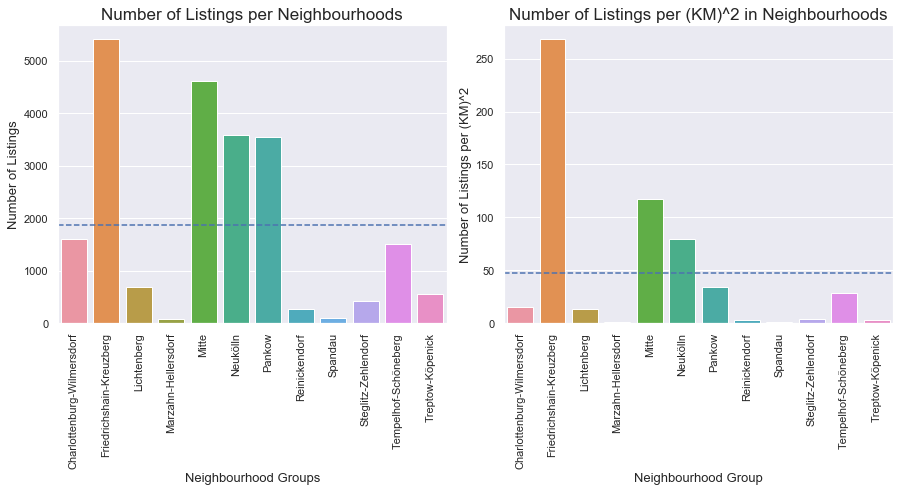

In [189]:
# Comparing the plots
fig, ax = plt.subplots(1,2, figsize = (13,7))

#https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_style("darkgrid")
sns.barplot(x="neighbourhood_group", y="num_listings", data=countNeighbourhood, ax = ax[0])
sns.barplot(x="neighbourhood_group", y="num_listings_per_km2", data=countNeighbourhood, ax = ax[1])

# Formatting the plots
ax[0].set_xticklabels(countNeighbourhood["neighbourhood_group"].values, rotation=90)
ax[0].set_ylabel("Number of Listings", fontsize=13)
ax[0].set_xlabel("Neighbourhood Groups", fontsize=13)
ax[0].set_title("Number of Listings per Neighbourhoods", fontsize=17)
ax[1].set_xticklabels(countNeighbourhood["neighbourhood_group"].values, rotation=90)
ax[1].set_ylabel("Number of Listings per (KM)^2", fontsize=13)
ax[1].set_xlabel("Neighbourhood Group", fontsize=13)
ax[1].set_title("Number of Listings per (KM)^2 in Neighbourhoods", fontsize=17)
plt.tight_layout()

# Add mean as reference line
ax[0].axhline(countNeighbourhood["num_listings"].mean(), ls='--');
ax[1].axhline(countNeighbourhood["num_listings_per_km2"].mean(), ls='--');

We can see Friedrichshain-Kreuzberg is the most dense area. After it, Mitte and Neukölln can be ranked.

Let's check the occupancy rates

In [190]:
# Create data frame with occupancy rate and listing density for each neighbourhood
# Grouping functions
f = {"id":["count"], "occupancy_rate":["mean"]}

# Grouping data
occupancyNeighbourhood = popular_areas[["neighbourhood_group_cleansed","id","occupancy_rate"]]
occupancyNeighbourhood = occupancyNeighbourhood.groupby("neighbourhood_group_cleansed", as_index=False).agg(f)
occupancyNeighbourhood.columns = ["neighbourhood_group", "num_listings", "occupancy_rate"]
occupancyNeighbourhood = occupancyNeighbourhood.sort_values("neighbourhood_group")

# Calculate density
occupancyNeighbourhood["area_km2"] = areaNeighbourhood["area_km2"]
occupancyNeighbourhood["listings_per_km2"] = occupancyNeighbourhood["num_listings"] / occupancyNeighbourhood["area_km2"]

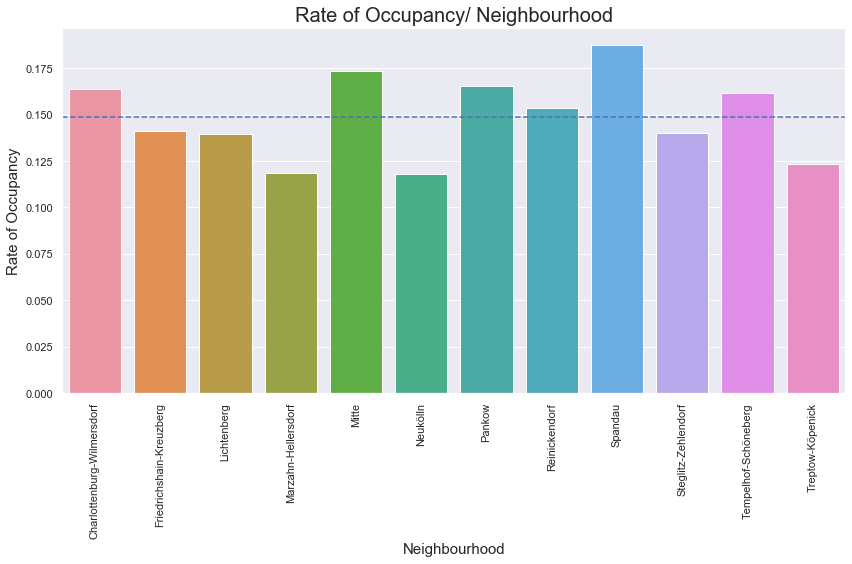

In [191]:
# Plot occupancy rate / neihbourhood group
plt.subplots(figsize=(12,8))
sns.set(style="white")
ax = sns.barplot(x="neighbourhood_group", y="occupancy_rate", data=occupancyNeighbourhood)
plt.xticks(rotation=90);
plt.title("Rate of Occupancy/ Neighbourhood", fontsize=20)
plt.ylabel("Rate of Occupancy", fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.tight_layout()

# Add median as reference line
ax.axhline(occupancyNeighbourhood ["occupancy_rate"].mean(), ls='--');

Popularity

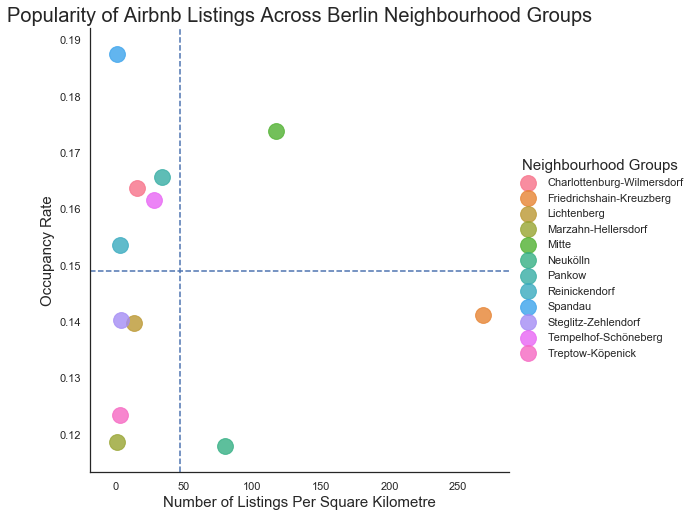

In [192]:
# Plot occupancy vs. listing count per square kilometre for neighbourhood groups
sns.set(style="white")
p = sns.lmplot("listings_per_km2", "occupancy_rate", data=hood_occupancy,hue="neighbourhood_group", fit_reg=False,
               height=7, aspect=1, scatter_kws={"s": 250})

# Add mean as reference line
plt.axhline(hood_occupancy["occupancy_rate"].mean(), ls='--');
plt.axvline(hood_occupancy["listings_per_km2"].mean(), ls='--');

# Set labels
plt.title("Popularity of Airbnb Listings Across Berlin Neighbourhood Groups", fontsize=20)
plt.ylabel("Occupancy Rate", fontsize=15)
plt.xlabel("Number of Listings Per Square Kilometre", fontsize=15)
p._legend.set_title("Neighbourhood Groups")
plt.setp(p._legend.get_title(), fontsize=15);